<p> <font color = cyan size = +2> PyWeather </font> </p>

In [1]:
import pandas as pd 
import json 
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import requests
import numpy as np
from citipy import citipy
import time
import urllib.parse

In [58]:
# Generate random lon and lat.
# Generate cities and city names
n = np.arange(0,200)
lat = [np.random.randint(-90,90) for x in n]
lon = [np.random.randint(-180,180) for x in n]
cities = [citipy.nearest_city(lat[x],lon[x]) for x in n]
citname = [x.city_name for x in cities]

In [59]:
# Rename cities for url format
url_city = [ city.replace(' ','+') for city in citname]

In [60]:
# Insert keys and url 
api_key = "826c70cd546761a184ba2e0e54893073"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

# Build query URL
target_url = [url + "appid=" + api_key + "&units=" + units + "&q=" + city for city in url_city]
        

In [69]:
data_all=[requests.get(url).json() for url in target_url]

In [64]:
# The openweather api doesn't contain data for every city that it can generate. 
# Accomodation provided by the except. 
# Obtain data

temp = []
lat = []
humid = []
cloud = []
wind = []

for x in data_all:
    try:
        temp_get = x.get('main').get('temp')
        lat_get = x.get('coord').get('lat')
        humid_get = x.get('main').get('humidity')
        cloud_get = x.get('clouds').get('all')
        wind_get = x.get('wind').get('speed')
        
        temp.append(temp_get)
        humid.append(humid_get)
        cloud.append(cloud_get)
        wind.append(wind_get)
        lat.append(lat_get)
        
    except:
        continue

<p> Temperature (F) vs. Latitude </p>

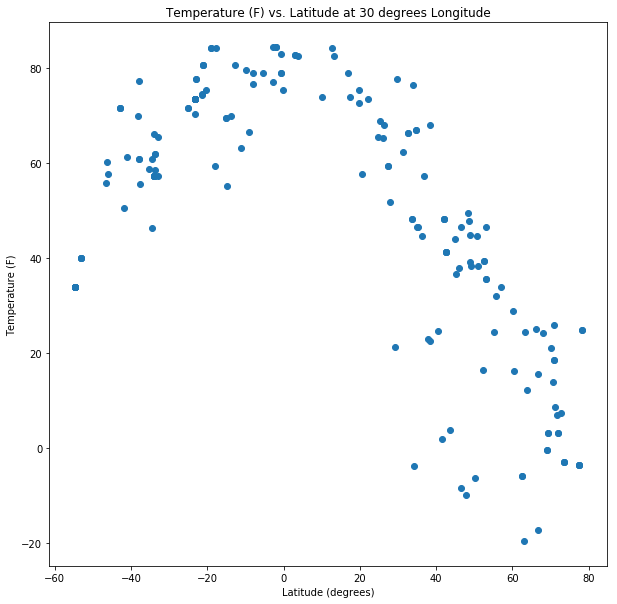

In [65]:
plt.figure(figsize=(10,10))
plt.title("Temperature (F) vs. Latitude at 30 degrees Longitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (F)')
plt.scatter(lat,temp)
plt.show()

<p> Humidity (%) vs. Latitude </p>

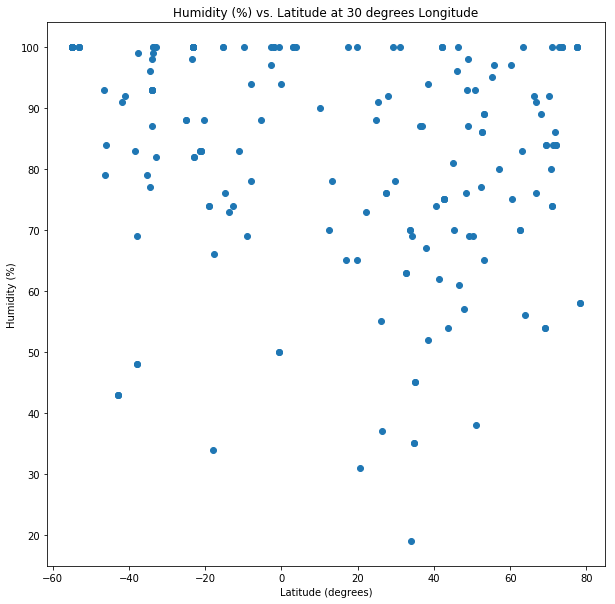

In [66]:
plt.figure(figsize=(10,10))
plt.title("Humidity (%) vs. Latitude at 30 degrees Longitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.scatter(lat,humid)
plt.show()

<p> Cloud Coverage (%) vs. Latitude </p>

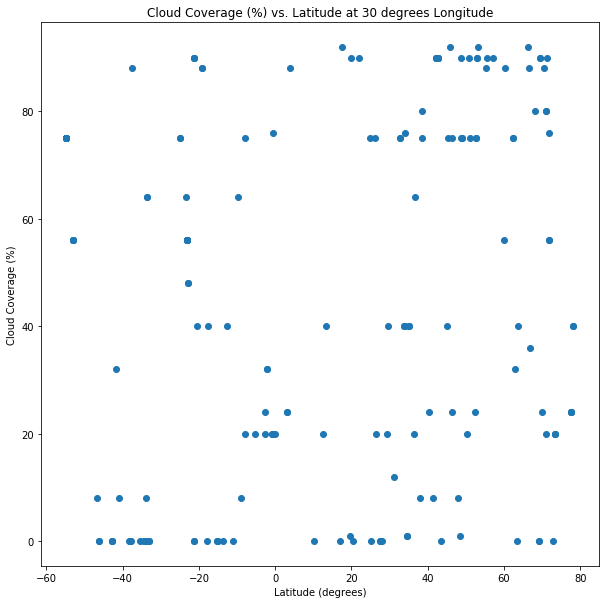

In [67]:
plt.figure(figsize=(10,10))
plt.title("Cloud Coverage (%) vs. Latitude at 30 degrees Longitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloud Coverage (%)')
plt.scatter(lat,cloud)
plt.show()

<p> Wind Speed (mph) vs. Latitude </p>

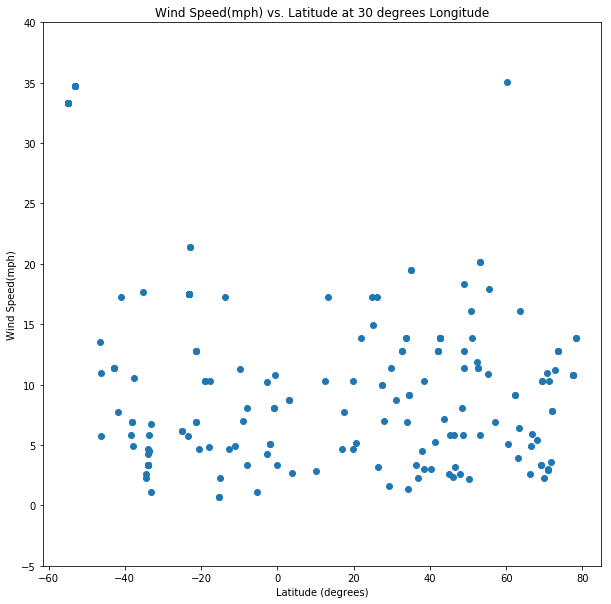

In [68]:
plt.figure(figsize=(10,10))
plt.title("Wind Speed(mph) vs. Latitude at 30 degrees Longitude")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed(mph)')
plt.ylim(-5,40)
plt.scatter(lat,wind)
plt.show()

<p> <font color = cyan size = +2> Conclusions </font> </p>

<p> 1. It is hotter at the equator  </p>
<p> 2. There isn't an obvious correlation between cloud coverage and lattitude </p>
<p> 3. The highest wind speeds occur near the poles </p>